## NAME :  SWETHA S
## TSF TASK - 3 Retail -Exploratory Data Analysis
#### steps involved
#### 1. Importing the Libraries
#### 2. Import the dataset
#### 3. Data Exploration
#### 4. Visualization

In [5]:
#IMPORT REQUIRED LIBRARIES
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#!pip install sweetviz to install the package
import sweetviz as sv

In [7]:
#load the dataset
retail=pd.read_csv('D:\\superstore.csv')
retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [8]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
retail.shape

(9994, 13)

In [10]:
retail.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [11]:
import seaborn as sns

<AxesSubplot:>

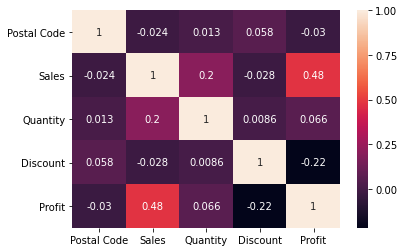

In [12]:
correlation=retail.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,fmt='.2g', 
            annot_kws=None, linewidths=0,annot=True)

In [13]:
#removing duplicates
retail.drop_duplicates(inplace=True)

In [14]:
#profit based on shipping
ship_group=retail.groupby(['Ship Mode'],as_index=False)['Profit'].sum()
ship_group

,Ship Mode,Profit
0,First Class,48953.6561
1,Same Day,15871.8869
2,Second Class,57446.6516
3,Standard Class,163969.2280


In [15]:
#profit based on city
city_group=retail.groupby(['City'],as_index=False)['Profit'].sum()
city_group

,City,Profit
0,Aberdeen,6.6300
1,Abilene,-3.7584
2,Akron,-186.6356
3,Albuquerque,634.0881
4,Alexandria,318.6183
...,...,...
526,Woonsocket,78.6791
527,Yonkers,2767.7557
528,York,-102.1692
529,Yucaipa,13.2080


In [16]:
#!pip install plotly
#!pip install cufflinks
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [17]:
ship_group.iplot(kind = 'bar', x = 'Ship Mode', y = 'Profit', title = 'Profit based on shipmode', xTitle='Ship Mode', 
          yTitle='Total Profit',barmode='stack', bargap=0.7,color='orange')

In [22]:
#Grouping the data by the category and its profit
c_g=retail.groupby(['Category'],as_index=False)['Profit'].sum()
c_g

,Category,Profit
0,Furniture,18421.8137
1,Office Supplies,122364.6608
2,Technology,145454.9481


In [29]:
import plotly.express as px
fig = px.bar(c_g, x='Category', y='Profit', text='Profit')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',bargap=0.7,title='Profit based on Category ')
fig.show()

In [31]:
#Groupby sub-categories and its profit
sc_g=retail.groupby(['Sub-Category'],as_index=False)['Profit'].sum()
sc_g.head()

,Sub-Category,Profit
0,Accessories,41936.6357
1,Appliances,18138.0054
2,Art,6524.6118
3,Binders,30228.0003
4,Bookcases,-3472.5560


In [69]:
fig = px.bar(sc_g, x='Sub-Category', y='Profit', text='Profit')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',bargap=0.7,title='Profit based on Sub-cateogry')
fig.show()

In [33]:
#grouping the data by profit based on the region
r_g=retail.groupby(['Region'],as_index=False)['Profit'].sum()
r_g

,Region,Profit
0,Central,39655.8752
1,East,91506.3092
2,South,46749.4303
3,West,108329.8079


In [35]:
fig = px.bar(r_g, y='Region', x='Profit', text='Profit')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',bargap=0.7,title='Profit based on Region')
fig.show()

In [37]:
s_g=retail.groupby(['State'],as_index=False)['Profit'].sum()
s_g.head()

,State,Profit
0,Alabama,5786.8253
1,Arizona,-3427.9246
2,Arkansas,4008.6871
3,California,76330.7891
4,Colorado,-6527.8579


In [67]:
s_g.iplot(kind = 'bar', x = 'State', y = 'Profit', title = 'Profit based on state', xTitle='State', 
          yTitle='Total Profit',color='lime')


In [71]:
se_g=retail.groupby(['Segment'],as_index=False).sum()
se_g.head()

,Segment,Postal Code,Sales,Quantity,Discount,Profit
0,Consumer,288269634,1.160833e+06,19497,820.51,134007.4413
1,Corporate,164108306,7.060701e+05,11591,476.85,91954.9798
2,Home Office,97903137,4.292927e+05,6732,261.83,60279.0015


In [73]:
se_g.iplot(kind = 'bar', x= 'Segment', y = 'Quantity', title = 'Segement Details', yTitle='Segment', 
          xTitle='Quantity',color='aqua',bargap=0.7)

In [74]:
advert_report = sv.analyze(retail)

#display the report
advert_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [78]:
#!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
#creating instance
av = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (9994, 13)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  4
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  2
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  1
    12 Predictors classified...
        This does not include the Target column(s)
        3 variables removed since they were ID or low-information variables

################ Multi_Classification VISUALIZATION Started #####################


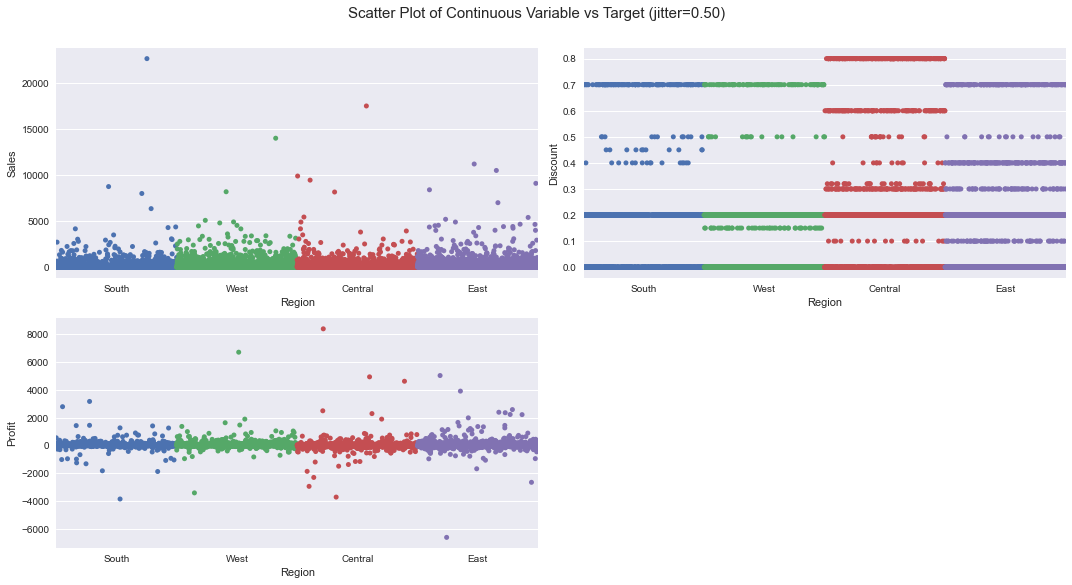

Total Number of Scatter Plots = 6


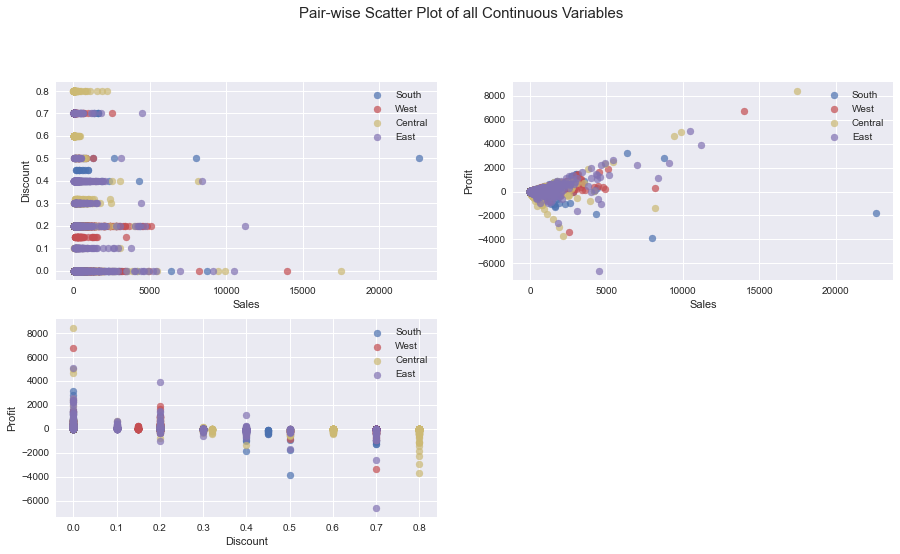

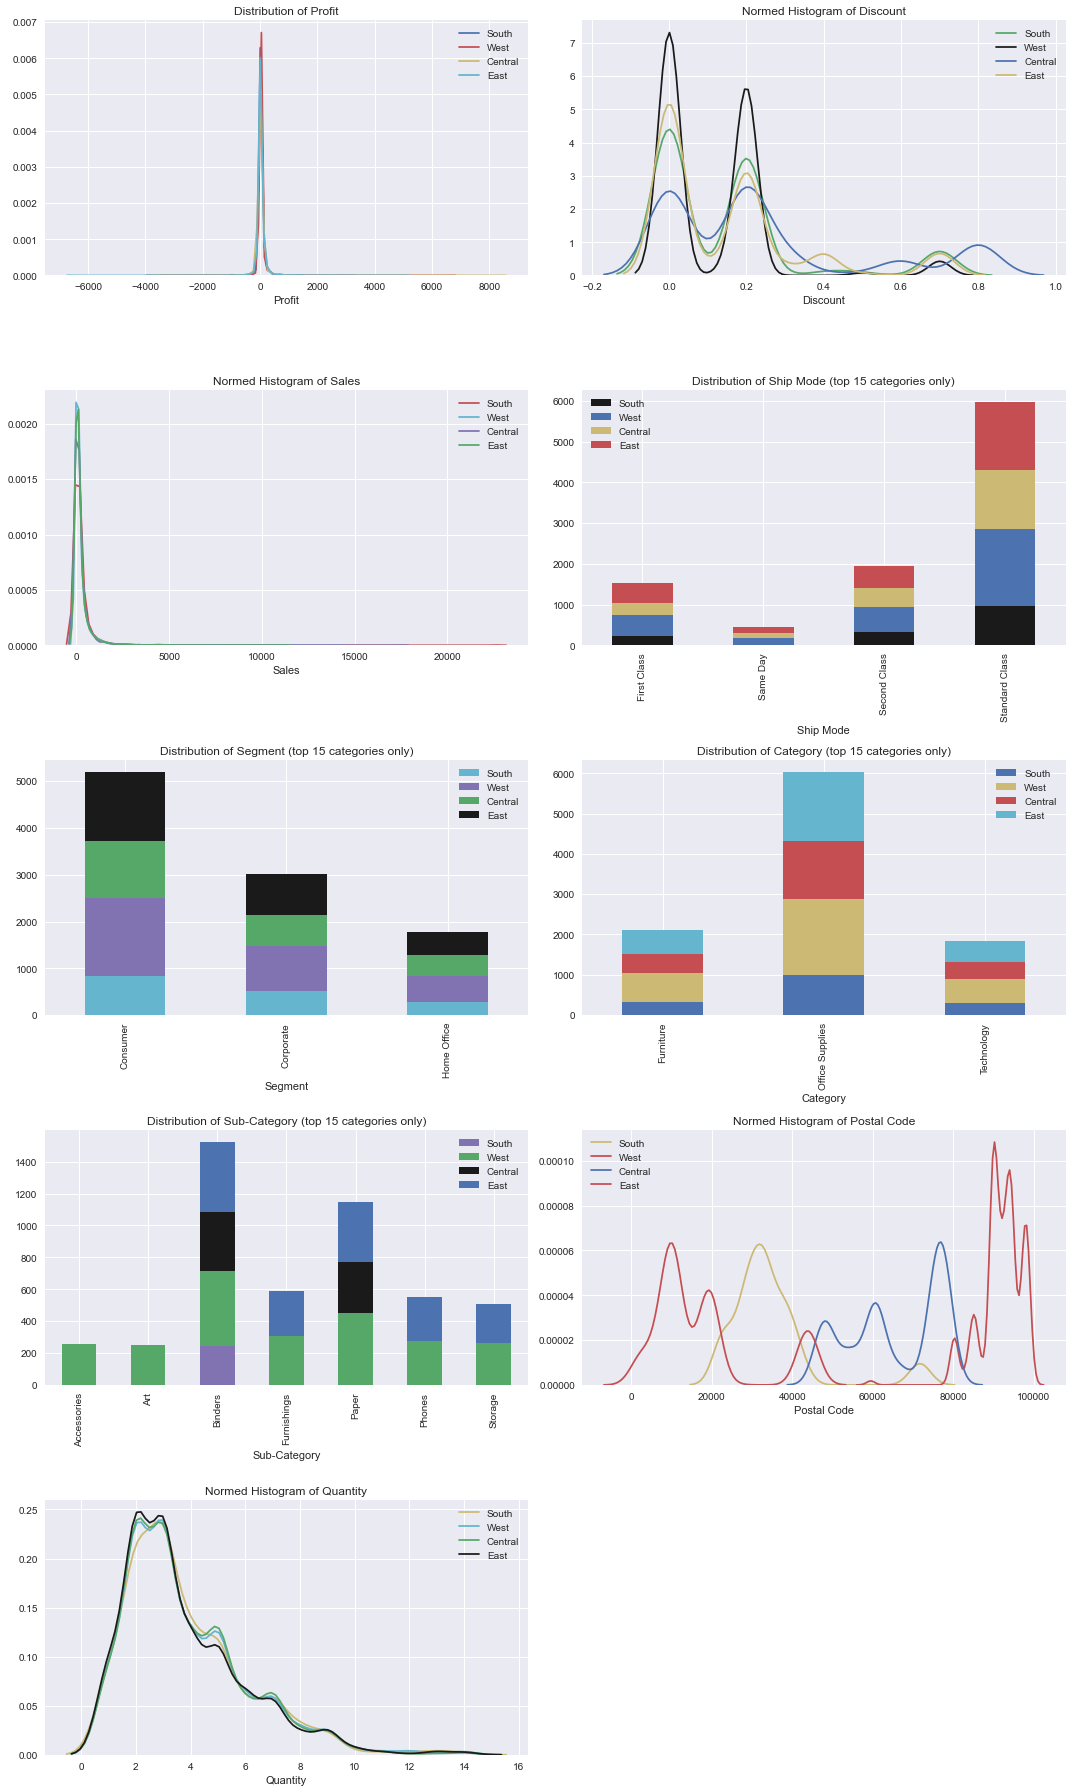

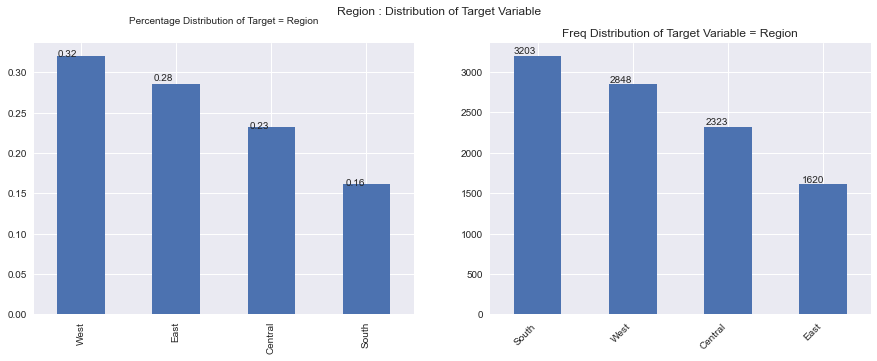

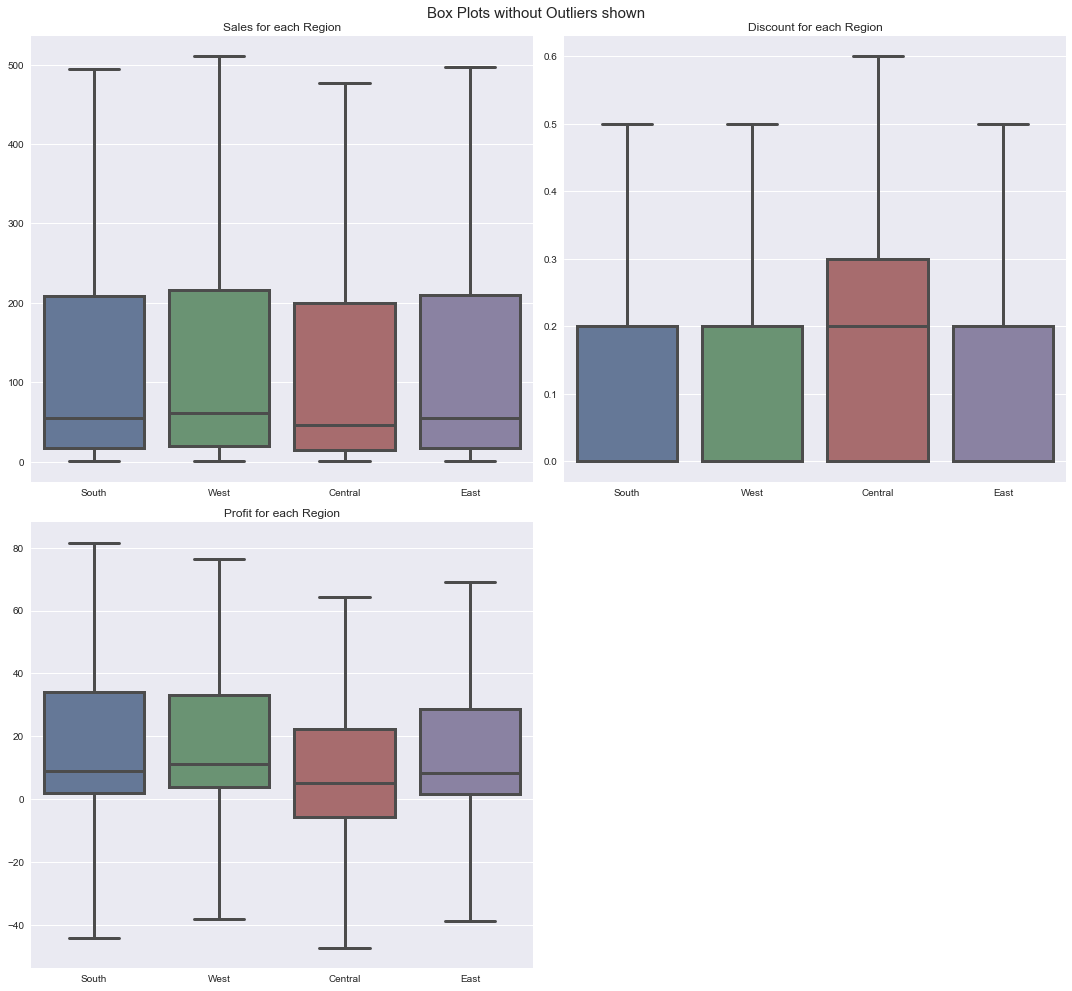

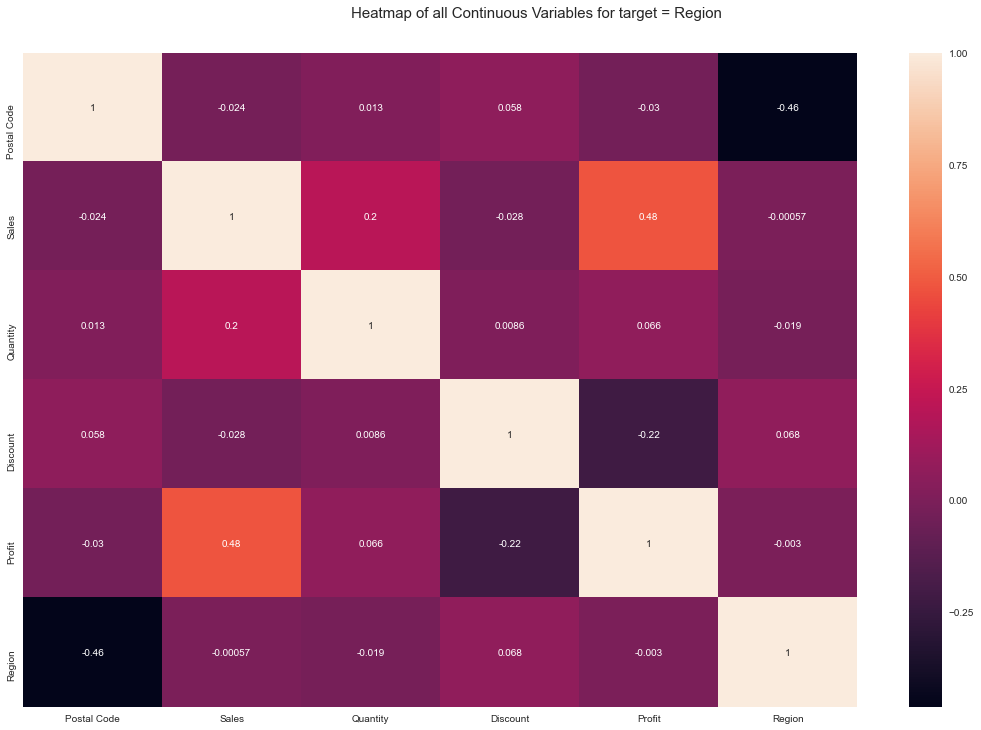

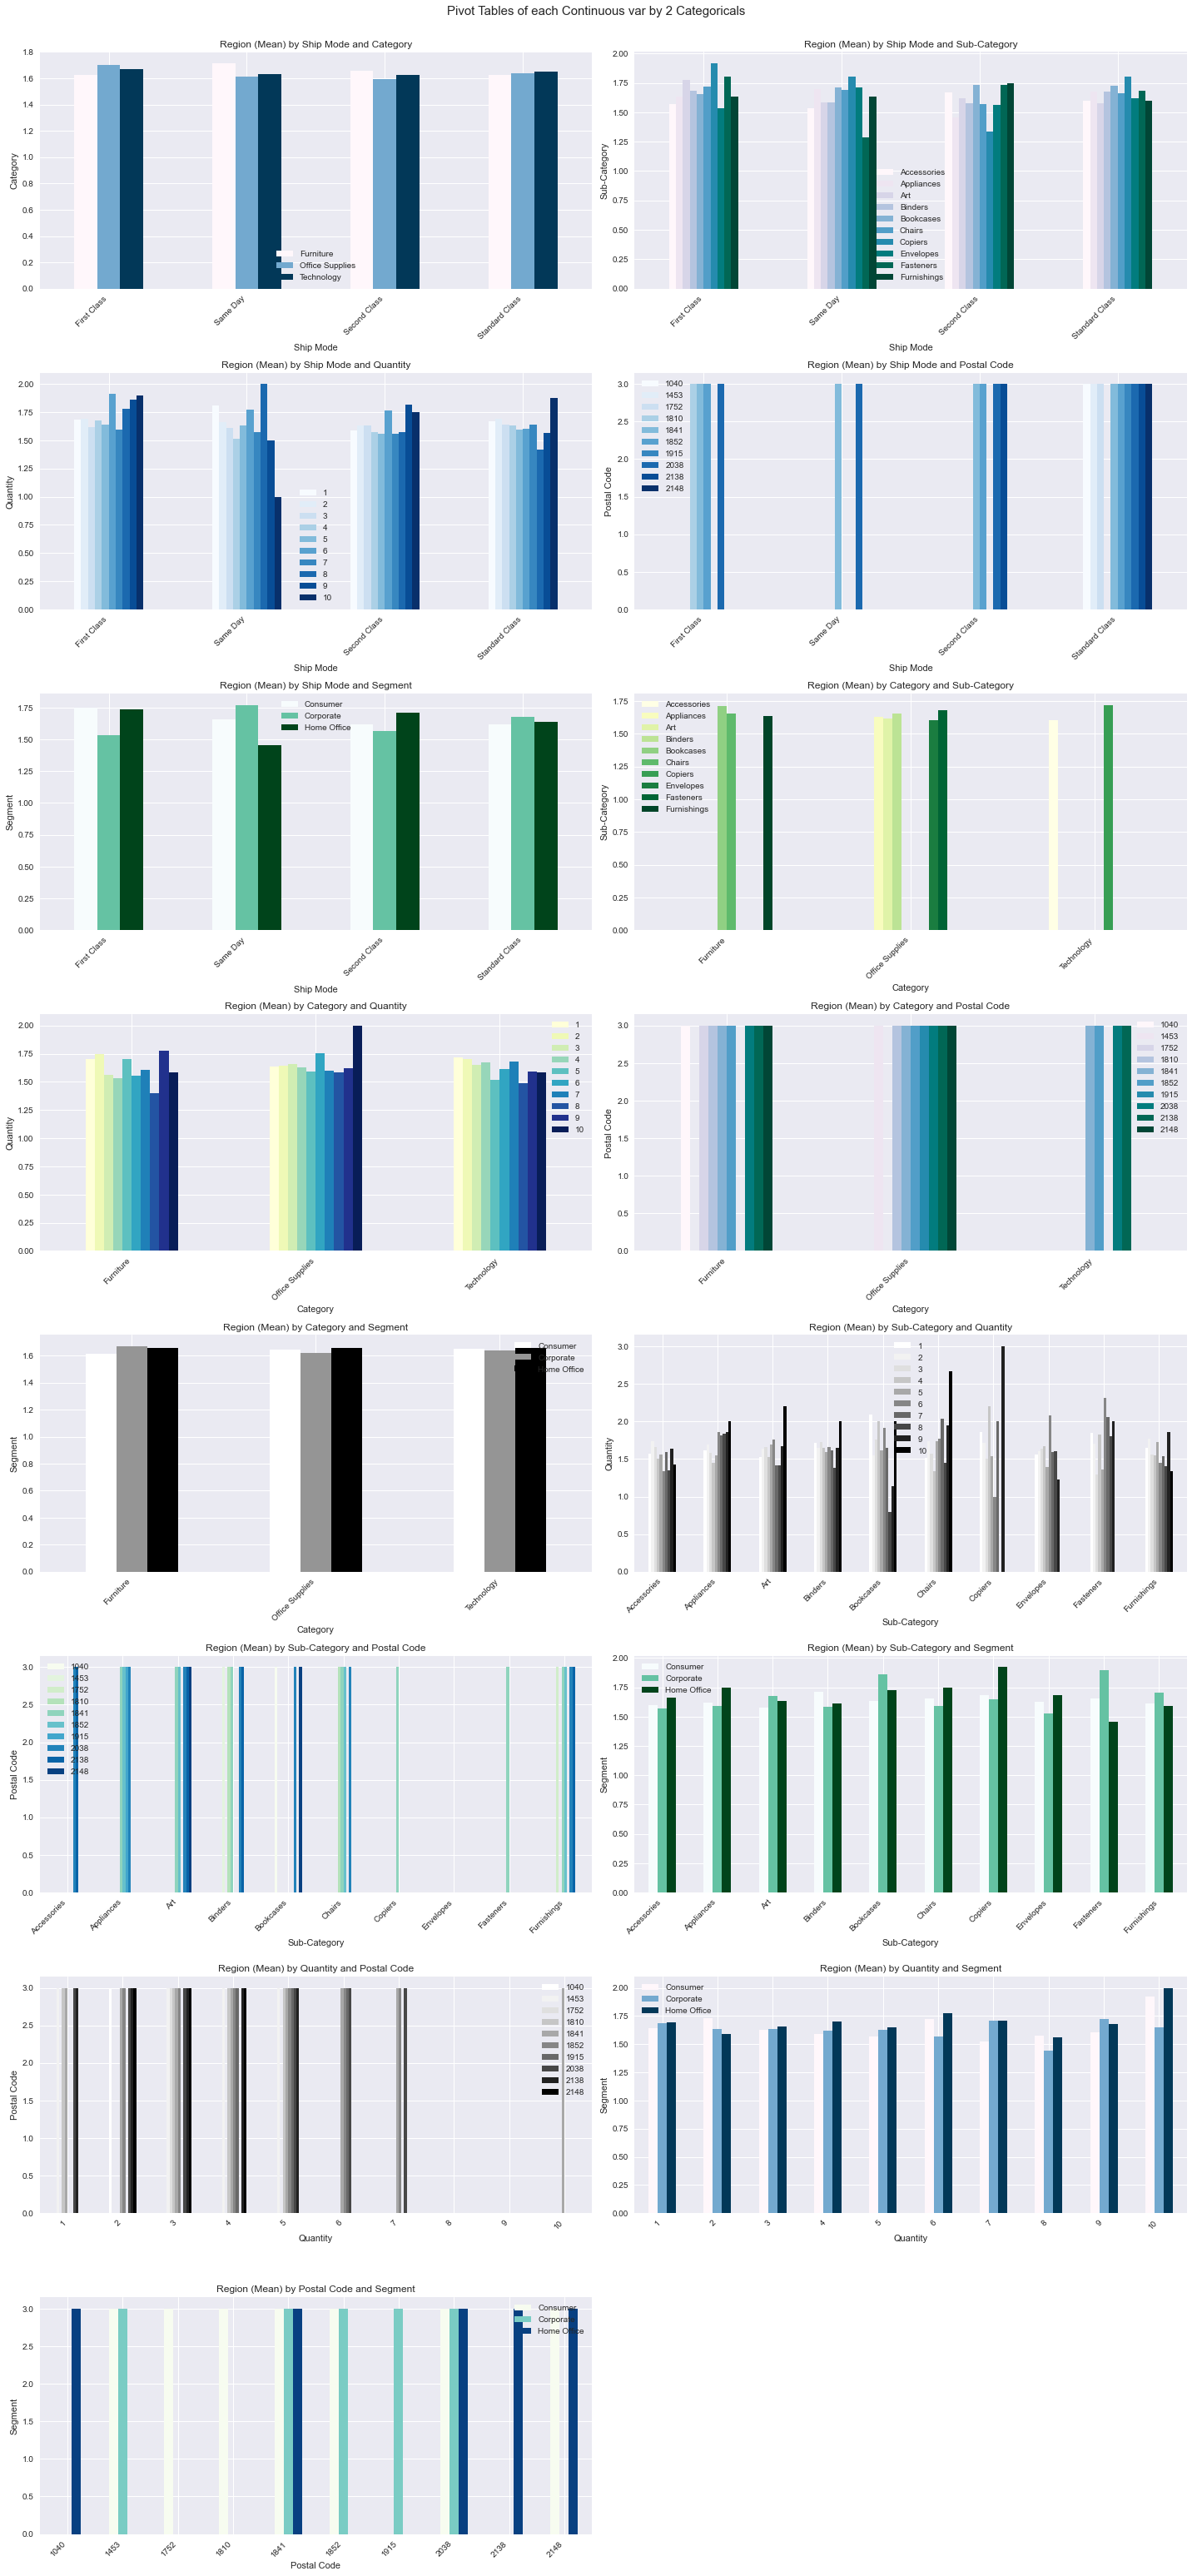

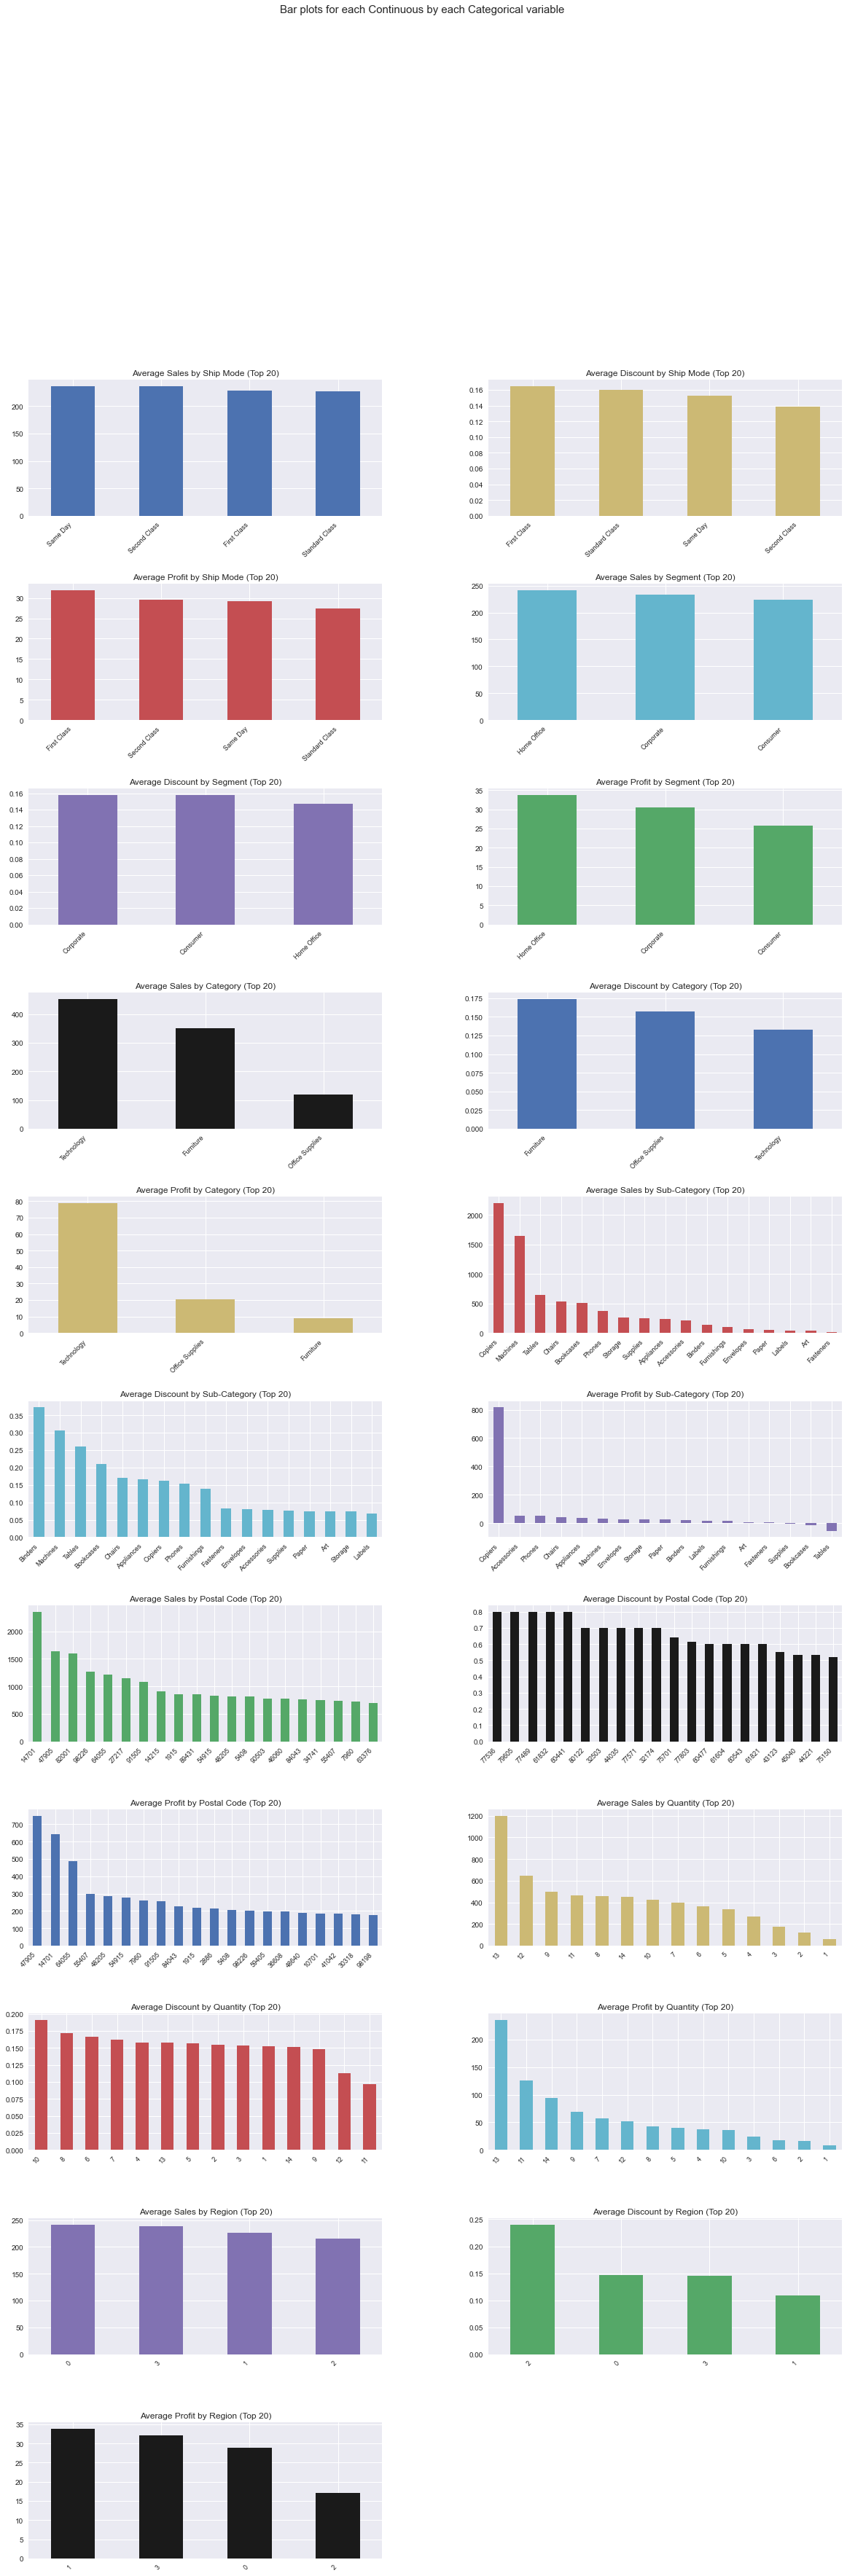

Time to run AutoViz (in seconds) = 58.664

 ###################### VISUALIZATION Completed ########################


In [80]:
df = av.AutoViz('D:\\superstore.csv',depVar='Region')

### UNDERSTANDING FROM THE VISUALIZATION

#### Central region lacks in profit
#### Texas state lacks in profit